In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("profiles.csv")
df.shape

(59946, 31)

In [239]:
df.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
#education categories value counts
df['education'].value_counts().head()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
Name: education, dtype: int64

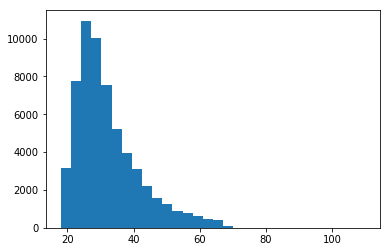

In [9]:
#age distribution
plt.hist(df.age, bins=30)
plt.show()

#### Spatial Visualization

In [11]:
#only look at the people in California
cal = df[df['location'].str.contains('california')]
cal.shape

(59855, 31)

In [12]:
cal['female'] = cal['sex']=='f'
cal['male'] = cal['sex']=='m'

C:\Users\lliu9\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lliu9\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
cal.location.value_counts()

san francisco, california          31064
oakland, california                 7214
berkeley, california                4212
san mateo, california               1331
palo alto, california               1064
alameda, california                  910
san rafael, california               755
hayward, california                  747
emeryville, california               738
redwood city, california             693
daly city, california                681
san leandro, california              651
walnut creek, california             644
vallejo, california                  558
menlo park, california               479
richmond, california                 424
south san francisco, california      416
mountain view, california            384
novato, california                   369
burlingame, california               361
pleasant hill, california            347
castro valley, california            345
stanford, california                 341
el cerrito, california               325
pacifica, califo

In [14]:
#poll in public data on California cities
citiesmeta = pd.read_csv("california_cities.csv")
citiesmeta.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [15]:
def transfromname(df):
    '''
    The function transforms city names in origina data into the format in citiesmeta.
    '''
    Name = [i.capitalize() for i in df['name'].split(',')[0].split(' ')]
    
    return ''.join(Name)

In [245]:
def getlocation(df):
    '''
    The function returns the latd and longd of a given city in California.
    '''
    try:
        if df['name'] in citiesmeta['city'].values:
            geo = citiesmeta[citiesmeta['city']==df['name']][['latd', 'longd']].values
            return geo.tolist()[0]
        
    except KeyError:
        
        return None

In [18]:
aggcity = cal.groupby('location').agg({'sex':'count', 'female':'sum', 'male':'sum'})
aggcity['name'] = aggcity.index
aggcity['city'] = aggcity.apply(transfromname, axis=1)

#This way is too slow. I find it's quicker to just merge the two tables.
#location = aggcity.apply(getlocation, axis=1)

In [16]:
maleage = cal[cal['sex']=='m'].groupby('location').agg({'age':'mean'})
femaleage = cal[cal['sex']=='f'].groupby('location').agg({'age':'mean'})
maleage['name'] = maleage.index
femaleage['name'] = femaleage.index

In [19]:
aggcity = aggcity.merge(maleage, on='name', how='inner')
aggcity = aggcity.merge(femaleage, on='name', how='inner')
aggcity.rename(columns={'age_x':'male_age', 'age_y':'female_age'}, inplace=True)

In [21]:
agg = aggcity.merge(citiesmeta, how='inner', on='city')
agg['gendergap'] = (agg['male']-agg['female'])
agg.head()

,sex,female,male,name,city,male_age,female_age,Unnamed: 0,latd,longd,...,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,gendergap
0,910,367.0,543.0,"alameda, california",Alameda,33.099448,35.923706,2,37.756111,-122.274444,...,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79,176.0
1,233,105.0,128.0,"albany, california",Albany,36.265625,38.819048,3,37.886944,-122.297778,...,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28,23.0
2,45,20.0,25.0,"atherton, california",Atherton,29.520000,29.200000,20,37.458611,-122.200000,...,59.0,6914,5.049,5.017,0.032,13.076,12.993,0.082,0.63,5.0
3,243,94.0,149.0,"belmont, california",Belmont,33.812081,33.680851,34,37.518056,-122.291667,...,43.0,25835,4.630,4.621,0.009,11.992,11.970,0.022,0.19,55.0
4,203,86.0,117.0,"benicia, california",Benicia,31.726496,36.523256,36,38.063333,-122.156111,...,26.0,26997,15.720,12.929,2.791,40.714,33.486,7.229,17.75,31.0


In [22]:
agg.describe()

,sex,female,male,male_age,female_age,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,gendergap
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,46.000000,60.000000,6.100000e+01,61.000000,61.000000,61.000000,59.000000,59.000000,59.000000,60.000000,61.000000
mean,958.639344,386.131148,572.508197,33.643269,34.173144,250.622951,37.576926,-122.084499,32.858696,95.666667,1.539017e+05,34.881213,26.463246,8.416328,82.843898,68.426169,14.415847,19.409167,186.377049
std,4058.466743,1622.453291,2439.666546,3.854273,5.176274,130.316559,0.956210,0.972678,42.585426,128.133758,5.282666e+05,83.110703,72.268040,24.815988,208.023788,190.073956,24.548662,25.522887,835.166314
min,2.000000,1.000000,1.000000,24.000000,22.000000,2.000000,32.715000,-122.631389,2.000000,2.000000,1.792000e+03,1.556000,1.246000,0.000000,4.031000,3.226000,0.000000,0.000000,-37.000000
25%,38.000000,7.000000,25.000000,31.131313,31.857143,146.000000,37.551389,-122.425556,9.000000,30.000000,1.390300e+04,5.049000,3.756000,0.009000,12.815500,9.640000,0.022500,0.082500,3.000000
50%,203.000000,83.000000,117.000000,32.670188,34.285714,276.000000,37.804444,-122.288611,14.500000,44.500000,2.941300e+04,12.698000,9.141000,0.486000,32.887000,23.674000,1.259000,5.385000,31.000000
75%,424.000000,171.000000,280.000000,36.028916,37.400000,361.000000,37.935833,-122.156111,32.750000,105.000000,7.681500e+04,20.077000,15.221000,8.252000,51.693500,38.335500,20.561000,31.175000,106.000000
max,31064.000000,12265.000000,18799.000000,42.833333,45.942857,475.000000,38.555556,-117.162500,200.000000,660.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000,6534.000000


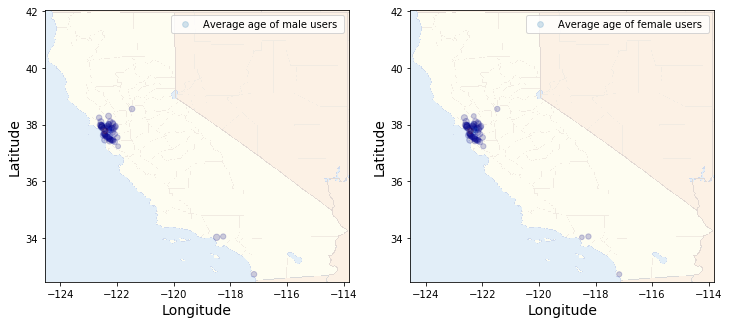

In [23]:
import matplotlib.image as mpimg

california_img=mpimg.imread('california.png')

fig, axes = plt.subplots(nrows=1, ncols=2)

ax1=agg.plot(kind="scatter", x="longd", y="latd", figsize=(12,10),
                       s=agg['male_age'], c=agg['male'], label="Average age of male users ",
                        cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.2, ax=axes[0]
                      )
ax1.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_xlabel("Longitude", fontsize=14)

#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

#plt.legend(fontsize=16)


ax2=agg.plot(kind="scatter", x="longd", y="latd", figsize=(12,10),
                       s=agg['female_age'], c=agg['female'], label="Average age of female users ",
                        cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.2, ax=axes[1]
                      )
ax2.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.3)
ax2.set_ylabel("Latitude", fontsize=14)
ax2.set_xlabel("Longitude", fontsize=14)

#prices = housing["median_house_value"]
#tick_values = np.linspace(prices.min(), prices.max(), 11)
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

#plt.legend(fontsize=16)

plt.savefig('map.png')

In [24]:
#city with oldest male user
agg.sort_values(by='male_age', ascending=False).iloc[0]

sex                                 12
female                               6
male                                 6
name                  ross, california
city                              Ross
male_age                       42.8333
female_age                     42.1667
Unnamed: 0                         358
latd                           37.9625
longd                         -122.555
elevation_m                         11
elevation_ft                        36
population_total                  2415
area_total_sq_mi                 1.556
area_land_sq_mi                  1.556
area_water_sq_mi                     0
area_total_km2                   4.031
area_land_km2                    4.031
area_water_km2                       0
area_water_percent                   0
gendergap                            0
Name: 43, dtype: object